# Detection

In [1]:
#importing the libraries

import numpy as np 
import cv2 
from collections import deque 
from color_selector import color_detector

In [2]:
# calling the colour function 
color_detector()

In [3]:
# color_arr()

bpoints = [deque(maxlen = 512)] 
gpoints = [deque(maxlen = 512)] 
ypoints = [deque(maxlen = 512)] 
rpoints = [deque(maxlen = 512)] 

In [4]:
# Now to mark the pointers in the above colour array we introduce some index values Which would mark their positions  

blue_index = 0
green_index = 0
yellow_index = 0
red_index = 0

In [5]:
# The kernel is used for dilation of contour

kernel = np.ones((5, 5))

In [6]:
# The ink colours for the drawing purpose 
 
colors = [(255, 0, 0), (0, 255, 0), (0, 225, 255), (0, 0, 255)] 
colorIndex = 0

In [7]:
# Setting up the drawing board AKA The canvas 

paintWindow = np.zeros((471, 636, 3)) + 255

cv2.namedWindow('Paint', cv2.WINDOW_AUTOSIZE) 

In [8]:
cap = cv2.VideoCapture(0) 

while True: 

    # Reading the camera frame 
    ret, frame = cap.read() 
    # For saving
    # out = cv2.VideoWriter("Paint-Window.mp4", cv2.VideoWriter_fourcc(*'XVID'), 1, (frame.shape[1], frame.shape[0]))
    
    # Flipping the frame to see same side of the user  
    frame = cv2.flip(frame, 1) 
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 

    # Getting the new positions of the trackbar and setting the new HSV values 

    u_hue = cv2.getTrackbarPos("Upper Hue", "Color detectors") 
    u_saturation = cv2.getTrackbarPos("Upper Saturation", "Color detectors") 
    u_value = cv2.getTrackbarPos("Upper Value","Color detectors") 
    l_hue = cv2.getTrackbarPos("Lower Hue", "Color detectors") 
    l_saturation = cv2.getTrackbarPos("Lower Saturation", "Color detectors") 
    l_value = cv2.getTrackbarPos("Lower Value", "Color detectors") 
    Upper_hsv = np.array([u_hue, u_saturation, u_value]) 
    Lower_hsv = np.array([l_hue, l_saturation, l_value]) 

    # Adding the colour buttons to the live frame to choose color
    frame = cv2.rectangle(frame, (35, 1), (135, 65), (122, 122, 122), -1) 
    frame = cv2.rectangle(frame, (160, 1), (255, 65), (255, 0, 0), -1) 
    frame = cv2.rectangle(frame, (275, 1), (370, 65), (0, 255, 0), -1) 
    frame = cv2.rectangle(frame, (390, 1), (485, 65), (0, 255, 255), -1) 
    frame = cv2.rectangle(frame, (505, 1), (600, 65), (0, 0, 255), -1) 

    cv2.putText(frame, "Clear All", (55, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 2, cv2.LINE_AA) 

    cv2.putText(frame, "Blue Color", (175, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 2, cv2.LINE_AA) 
    
    cv2.putText(frame, "Green Color", (285, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 2, cv2.LINE_AA) 

    cv2.putText(frame, "Yellow Color", (400, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (150, 150, 150), 2, cv2.LINE_AA) 

    cv2.putText(frame, "Red Color", (520, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 2, cv2.LINE_AA) 


    # masking out the pointer for it's identification in the frame 

    Mask = cv2.inRange(hsv, Lower_hsv, Upper_hsv) 
    Mask = cv2.erode(Mask, kernel, iterations = 1) 
    Mask = cv2.morphologyEx(Mask, cv2.MORPH_OPEN, kernel) 
    Mask = cv2.dilate(Mask, kernel, iterations = 1) 

    # Now contouring the pointers post identification 
    
    countours, _ = cv2.findContours(Mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
    centre = None

    # If there are any contours formed 
    if len(countours) > 0: 
        
        # sorting the contours for the biggest 
        countour = sorted(countours, key = cv2.contourArea, reverse = True)[0] 
        # Get the radius of the cirlce formed around the found contour   
        ((x, y), radius) = cv2.minEnclosingCircle(countour) 
        
        # Drawing the circle boundary around the contour 
        cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 2) 
        
        # Calculating the centre of the detected contour 
        M = cv2.moments(countour) 
        centre = (int(M['m10'] / M['m00']), int(M['m01'] / M['m00'])) 
        
        # Now checking if the user clicked on another button on the screen (the 4 buttons that were mentioned Y,G,B,R and clear all)
        if centre[1] <= 65: 
            
            # Clear Button 
            if 35 <= centre[0] <= 135: 
                bpoints = [deque(maxlen = 512)] 
                gpoints = [deque(maxlen = 512)] 
                ypoints = [deque(maxlen = 512)] 
                rpoints = [deque(maxlen = 512)] 

                blue_index = 0
                green_index = 0
                yellow_index = 0
                red_index = 0

                paintWindow[67:, :, :] = 255
            elif 160 <= centre[0] and centre[0] <= 255: 
                colorIndex = 0 # Blue 
                    
            elif 275 <= centre[0] and centre[0] <= 370: 
                colorIndex = 1 # Green 
            elif 390 <= centre[0] and centre[0] <= 485: 
                colorIndex = 2 # Yellow
            elif 505 <= centre[0] and centre[0] <= 600: 
                colorIndex = 3 # Red 
        else : 
            if colorIndex == 0: 
                bpoints[blue_index].appendleft(centre) 
            elif colorIndex == 1: 
                gpoints[green_index].appendleft(centre) 
            elif colorIndex == 2: 
                ypoints[yellow_index].appendleft(centre) 
            elif colorIndex == 3: 
                rpoints[red_index].appendleft(centre) 
                
    # Appending the next deques if nothing is detected

    else: 
        bpoints.append(deque(maxlen = 512)) 
        blue_index += 1
        gpoints.append(deque(maxlen = 512)) 
        green_index += 1
        ypoints.append(deque(maxlen = 512)) 
        yellow_index += 1
        rpoints.append(deque(maxlen = 512)) 
        red_index += 1

    # Drawing the lines of every colour on the canvas and the track frame window
    
    points = [bpoints, gpoints, ypoints, rpoints] 
    for i in range(len(points)): 
        for j in range(len(points[i])): 
            for k in range(1, len(points[i][j])): 
                if points[i][j][k - 1] is None or points[i][j][k] is None: 
                    continue
                    
                cv2.line(frame, points[i][j][k - 1], points[i][j][k], colors[i], 25) 
                cv2.line(paintWindow, points[i][j][k - 1], points[i][j][k], colors[i], 25) 

    key = cv2.waitKey(1)            
    if key & 0xFF == ord('f'):            
        cv2.imwrite("last_frame.jpg", paintWindow)
        

    # Displaying/running all the 3 windows 
    cv2.imshow("Live Tracking", frame) 
    cv2.imshow("Paint", paintWindow) 
    cv2.imshow("mask", Mask) 
    
    # For quitting/breaking the loop - press and hold ctrl+q twice 
    if cv2.waitKey(1) & 0xFF == ord("q"): 
        break

# Releasing the camera and all the other resources of the device  
cap.release() 
cv2.destroyAllWindows() 

# Recognition

In [9]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle
from PIL import Image
import tensorflow as tf

In [10]:
# Read the data...
data = pd.read_csv(r"C:\Users\prabh\Downloads\IIITNR\IV-SEM\MP-I\A_Z Handwritten Data.csv").astype('float32')

In [11]:
# Split data the X - Our data , and y - the prdict label
X = data.drop('0',axis = 1)
y = data['0']

In [12]:
# Reshaping the data in csv file so that it can be displayed as an image...

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))


print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [13]:
# Dictionary for getting characters from index values...
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

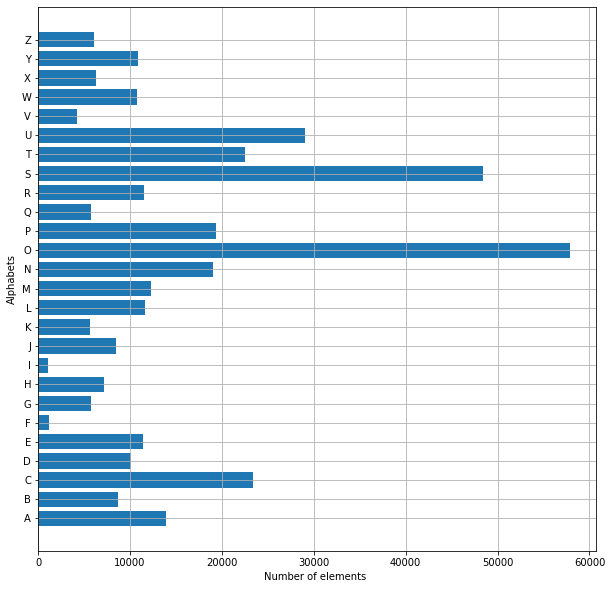

In [14]:
# Plotting the number of alphabets in the dataset...

train_yint = np.int0(y)
count = np.zeros(26, dtype='int')
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

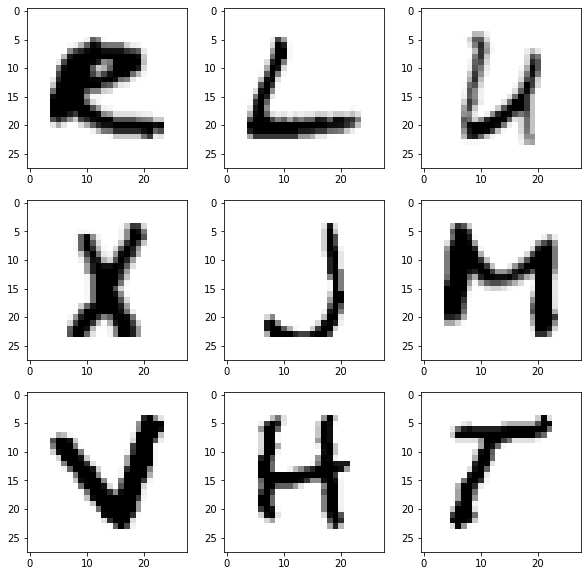

In [15]:
#Shuffling the data ...
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [16]:
#Reshaping the training & test dataset so that it can be put in the model...

train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [17]:
# Converting the labels to categorical values...

train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [18]:
Training = True # Change this to False if you want to use trained model after initial training

In [19]:
# CNN model...
if Training == True:
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    model.add(Flatten())

    model.add(Dense(64,activation ="relu"))
    model.add(Dense(128,activation ="relu"))

    model.add(Dense(26,activation ="softmax"))



    model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
    early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


    history = model.fit(train_X, train_yOHE, epochs=1, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_yOHE))


    model.summary()
    model.save(r'model_hand.h5')

    # Displaying the accuracies & losses for train & validation set...

    print("The validation accuracy is :", history.history['val_accuracy'])
    print("The training accuracy is :", history.history['accuracy'])
    print("The validation loss is :", history.history['val_loss'])
    print("The training loss is :", history.history['loss'])
    
else:
    model = tf.keras.models.load_model(r'C:\Users\prabh\Downloads\IIITNR\IV-SEM\MP-I\Final\Code\model_hand.h5')
    

9312/9312 [==============================] - 182s 19ms/step - loss: 0.1509 - accuracy: 0.9590 - val_loss: 0.0699 - val_accuracy: 0.9802
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)      

In [20]:
#Making model predictions...

pred = model.predict(test_X[:9])
print(test_X.shape)

(74490, 28, 28, 1)


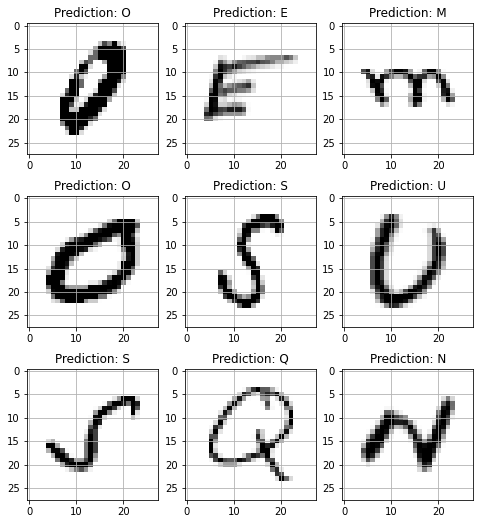

In [21]:
# Displaying some of the test images & their predicted labels...

fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [22]:
# Prediction on external image...

img = cv2.imread(r'C:\Users\prabh\Downloads\IIITNR\IV-SEM\MP-I\Final\last_frame.jpg')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))


img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "Dataflair _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)

cv2.waitKey()
while(1):
    k = input()
    if k == 'z':
        break

cv2.destroyAllWindows()